# NLP Eda


Данная часть EDA посвящена анализу смысловой составляющей роликов, которые удалось извлечь расшифровок базы видео.


In [142]:
import json
import os
import pathlib

ROOT_PATH = pathlib.Path().resolve().parent
print(ROOT_PATH)
RANDOM_SEED = 42

# os.chdir(ROOT_PATH)

/Users/andrey/PycharmProjects/vector-search-hse


In [143]:
import pandas as pd

df = pd.read_parquet(ROOT_PATH / 'data/corpora.parquet')
df.head()

,filename,text,n_tokens,length,lang,score,preprocessed_text,tokenized_text,filtered_tokens,filtered_n_tokens,unique_tokens,unique_n_tokens,is_valid
0,IMG_0703.tsv,This is the most dangerous strike in mixed mar...,171,877,en,0.850605,this is the most dangerous strike in mixed mar...,"[this, is, the, most, dangerous, strike, in, m...","[dangerous, strike, mixed, martial, arts, hamm...",78,"[strike, whole, moat, right, pull, shot, time,...",67,True
1,IMG_0704.tsv,"So this puzzle is a little harder, but let's g...",142,760,en,0.981890,so this puzzle is little harder but let give i...,"[so, this, puzzle, is, little, harder, but, le...","[puzzle, little, harder, let, give, go, mitten...",73,"[added, let, new, two, bridge, link, issues, d...",62,True
2,IMG_0705.tsv,I want to talk about the lie of cultural appro...,716,3971,en,0.983911,want to talk about the lie of cultural appropr...,"[want, to, talk, about, the, lie, of, cultural...","[want, talk, lie, cultural, appropriation, whi...",341,"[ignorant, believe, leave, much, lie, video, a...",200,True
3,IMG_0707.tsv,"I was like, oh girl, shock it, I can't let you...",36,157,en,0.988990,was like oh girl shock it can let you care sav...,"[was, like, oh, girl, shock, it, can, let, you...","[like, oh, girl, shock, let, care, save, girl,...",18,"[let, fall, turn, like, care, save, oh, eyes, ...",10,True
4,IMG_0708.tsv,I Thank you. Thank you.,5,23,en,0.991097,thank you thank you,"[thank, you, thank, you]","[thank, thank]",2,[thank],1,False


In [144]:

df = df[df['unique_n_tokens'] > 10]
df.sort_values(by='unique_n_tokens', ascending=True)

,filename,text,n_tokens,length,lang,score,preprocessed_text,tokenized_text,filtered_tokens,filtered_n_tokens,unique_tokens,unique_n_tokens,is_valid
260,IMG_1714.tsv,"As I record this, the fastest car in the world...",23,119,en,0.852711,as record this the fastest car in the world go...,"[as, record, this, the, fastest, car, in, the,...","[record, fastest, car, world, goes, zero, zero...",13,"[per, record, zero, holy, wow, hour, car, fast...",11,True
27,IMG_0743.tsv,"You know what, no, I'm done. Enough is enough,...",25,148,en,0.953837,you know what no done enough is enough okay do...,"[you, know, what, no, done, enough, is, enough...","[know, done, enough, enough, okay, wanna, know...",15,"[think, love, stupid, wanna, chucklenuts, know...",11,True
13,IMG_0724.tsv,"What you got to do, what you got to do, I can'...",57,262,en,0.989010,what you got to do what you got to do can even...,"[what, you, got, to, do, what, you, got, to, d...","[got, got, even, rush, fuck, sing, old, yeah, ...",22,"[piss, fuck, like, going, even, rush, sing, st...",11,True
224,IMG_1439.tsv,Generals gathered in their masses Just like wi...,20,130,en,0.893260,generals gathered in their masses just like wi...,"[generals, gathered, in, their, masses, just, ...","[generals, gathered, masses, like, witches, bl...",14,"[masses, black, evil, gathered, plot, like, de...",12,True
140,IMG_1087.tsv,I know you've lost friends too. You could be n...,35,165,en,0.977804,know you ve lost friends too you could be next...,"[know, you, ve, lost, friends, too, you, could...","[know, lost, friends, could, next, give, us, h...",15,"[think, half, fight, us, sorry, next, could, k...",13,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,IMG_1681.tsv,why are our brains hardwired to panic when a f...,1620,8627,en,0.947349,why are our brains hardwired to panic when fac...,"[why, are, our, brains, hardwired, to, panic, ...","[brains, hardwired, panic, face, looks, almost...",724,"[phd, back, give, actually, trying, next, ance...",356,True
23,IMG_0739.tsv,"All right, I'm about to fucking talk about som...",1854,9814,en,0.990715,all right about to fucking talk about somethin...,"[all, right, about, to, fucking, talk, about, ...","[right, fucking, talk, something, literally, t...",865,"[leave, makes, back, everybody, actually, fuck...",375,False
220,IMG_1404.tsv,a lot of you guys want this video explained. F...,1521,8192,en,0.971146,lot of you guys want this video explained firs...,"[lot, of, you, guys, want, this, video, explai...","[lot, guys, want, video, explained, firstly, r...",772,"[currently, believe, makes, back, leave, else,...",386,False
237,IMG_1538.tsv,A British creator who accidentally got trapped...,1427,8030,en,0.837752,british creator who accidentally got trapped i...,"[british, creator, who, accidentally, got, tra...","[british, creator, accidentally, got, trapped,...",692,"[believe, secret, injured, army, enters, ah, a...",413,False


# Topic Modelling

In [145]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
lem = nltk.WordNetLemmatizer()
stop = set(stopwords.words('english'))


def preprocess_texts(texts):
    corpus = []

    for text in texts:
        words = [w for w in word_tokenize(text) if (w not in stop)]

        words = [lem.lemmatize(w) for w in words if len(w) > 2]

        corpus.append(words)
    return corpus


[nltk_data] Downloading package punkt to /Users/andrey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/andrey/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/andrey/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [146]:
import gensim

corpus = preprocess_texts(df['preprocessed_text'].values)
dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [147]:
lda_model = gensim.models.LdaMulticore(
    bow_corpus,
    num_topics=4,
    id2word=dic,
    passes=10,
    workers=2,
    random_state=RANDOM_SEED,
)
lda_model.show_topics()

[(0,
  '0.015*"like" + 0.007*"one" + 0.007*"know" + 0.007*"get" + 0.006*"people" + 0.006*"going" + 0.005*"right" + 0.005*"thing" + 0.005*"really" + 0.004*"first"'),
 (1,
  '0.012*"like" + 0.010*"going" + 0.007*"one" + 0.007*"want" + 0.006*"get" + 0.006*"bye" + 0.005*"pack" + 0.005*"time" + 0.004*"mushroom" + 0.004*"lot"'),
 (2,
  '0.018*"like" + 0.011*"chicken" + 0.009*"let" + 0.009*"going" + 0.008*"make" + 0.007*"one" + 0.006*"know" + 0.006*"time" + 0.005*"get" + 0.005*"yeah"'),
 (3,
  '0.014*"like" + 0.010*"one" + 0.009*"yeah" + 0.008*"know" + 0.006*"right" + 0.006*"good" + 0.006*"time" + 0.005*"cell" + 0.005*"make" + 0.005*"love"')]

In [148]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=corpus, dictionary=dic, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.2734026771487427


In [149]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bow_corpus, dic, mds='tsne', )
vis

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
3      40.474869 -28.099413       1        1  29.224116
0     -37.149956  93.122086       2        1  25.999302
1      62.247219  71.390793       3        1  24.136598
2     -58.889488  -6.144586       4        1  20.639985, topic_info=            Term       Freq       Total Category  logprob  loglift
675      chicken  90.000000   90.000000  Default  30.0000  30.0000
418         cell  57.000000   57.000000  Default  29.0000  29.0000
300          bye  63.000000   63.000000  Default  28.0000  28.0000
505         pack  52.000000   52.000000  Default  27.0000  27.0000
2772  chromosome  35.000000   35.000000  Default  26.0000  26.0000
...          ...        ...         ...      ...      ...      ...
234         need  20.447923   84.967048   Topic4  -5.8202   0.1536
247       really  22.655174  141.493988   Topic4  -5.7177  -0.2539
46         right  22.116421  151.890771   Topic4  -5.7418  -0.3489
33          look  20.122833   85.990098   Topic4  -5.8362   0.1256
330         made  19.748439   81.175413   Topic4  -5.8550   0.1644

[319 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
293       1  0.349030  actually
293       2  0.228212  actually
293       3  0.281909  actually
293       4  0.147667  actually
480       1  0.058458       add
...     ...       ...       ...
121       1  0.406881       yes
121       2  0.331533       yes
121       3  0.120557       yes
121       4  0.135627       yes
4675      3  0.904131  zucchini

[502 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3])

# Тюнинг количества топиков

Текущий скор для 4-х топиков - 0.27. Постараемся найти оптимальное количество параметров для нашей модели топиков

Для поиска оптимального количества токенов можно воспользоваться техникой прогона по сетке `GridSearch`

In [150]:
from typing import Dict, Any, List, Union
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
import numpy as np
import tqdm


def compute_coherence_values(corpus, dictionary, texts, k, a, b):
    lda_model = gensim.models.LdaMulticore(
        corpus=corpus,
        id2word=dictionary,
        num_topics=k,
        random_state=100,
        chunksize=100,
        passes=10,
        alpha=a,
        eta=b,
    )

    coherence_model_lda = CoherenceModel(
        model=lda_model,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v',
    )

    return coherence_model_lda.get_coherence()


def tune_coherence_scores(
    dictionary: Dict[str, Any],
    corpus: List[List[str]],
    texts: List[str],
    alpha: List[Union[float, str]],
    beta: List[Union[float, str]],
    max_topics: int,
    min_topics: int = 2,
    step_size: int = 3,
) -> Dict[str, Any]:
    """
    Функция вычисляет метрики для оценки тем. моделирования и выводит 
    график, где по оси x отложено количество топиков, а по оси y — значение 
    метрики
    """

    grid = {}
    grid['Validation_Set'] = {}
    topics_range = range(min_topics, max_topics, step_size)


    model_results = {
        'Topics': [],
        'Alpha': [],
        'Beta': [],
        'Coherence': []
    }

    # Can take a long time to run

    pbar = tqdm.tqdm(total=(len(beta) * len(alpha) * len(topics_range)))
    # iterate through validation corpuses
    # iterate through number of topics
    for k in topics_range:
        # iterate through alpha values
        for a in alpha:
            # iterare through beta values
            for b in beta:
                # get the coherence score for the given parameters
                cv = compute_coherence_values(
                    corpus=corpus,
                    dictionary=dictionary,
                    texts=texts,
                    k=k,
                    a=a,
                    b=b)
                # Save the model results
                model_results['Topics'].append(k)
                model_results['Alpha'].append(a)
                model_results['Beta'].append(b)
                model_results['Coherence'].append(cv)

                pbar.update(1)
        #pd.DataFrame(model_results).to_csv('./results/lda_tuning_results.csv', index=False)
    pbar.close()
    return model_results

In [151]:
MIN_TOPICS = 4
MAX_TOPICS = 41
STEP_TOPIC = 4
MEASURE = 'c_v'

# Alpha parameter
#alpha = list(np.arange(0.01, 1, 0.3))
alpha = [0.01, 0.1]
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 0.1))
beta.append('symmetric')

scores = tune_coherence_scores(
    dic, 
    bow_corpus, 
    alpha=alpha,
    beta=beta,
    texts=corpus, 
    min_topics=MIN_TOPICS, 
    max_topics=MAX_TOPICS,
    step_size=STEP_TOPIC,
)


100%|██████████| 80/80 [10:45<00:00,  8.06s/it]


In [152]:
tuning_result = pd.DataFrame.from_records(scores)

tuning_result.sort_values('Coherence', ascending=False)

,Alpha,Beta,Coherence,Topics
75,0.1,symmetric,0.369782,40
79,asymmetric,symmetric,0.364158,40
78,asymmetric,0.01,0.358118,40
76,symmetric,0.01,0.356115,40
73,0.01,symmetric,0.353440,40
...,...,...,...,...
5,symmetric,symmetric,0.264711,4
2,0.1,0.01,0.264599,4
0,0.01,0.01,0.264599,4
3,0.1,symmetric,0.260893,4


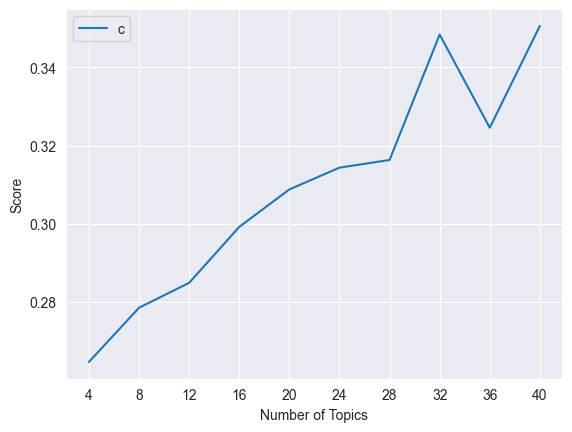

In [153]:
# Fixate alpha & beta
data_subset = tuning_result[(tuning_result['Alpha'] == 0.01) & (tuning_result['Beta'] == 0.01)]

plt.xticks(np.arange(MIN_TOPICS, MAX_TOPICS, STEP_TOPIC))
plt.yticks(np.arange(0.20, 0.40, 0.02))

plt.plot(data_subset['Topics'], data_subset['Coherence'])
plt.xlabel("Number of Topics")
plt.ylabel('Score')
plt.legend(('coherence_score'), loc='best')
plt.show()

Как мы видим - в зависимости от количества топиков - растет c_v скор для тематического моделирования с помощью LDA

Попробуем выделить ещё больше топиков и посмотреть как это влияет на наш скор при фиксированных alpha, beta

In [154]:
MIN_TOPICS = 4
MAX_TOPICS = 41
STEP_TOPIC = 4
MEASURE = 'c_v'

# Alpha parameter
alpha =[0.01]

# Beta parameter
beta = [0.01]


scores = tune_coherence_scores(
    dic, 
    bow_corpus, 
    alpha=alpha,
    beta=beta,
    texts=corpus, 
    min_topics=MIN_TOPICS, 
    max_topics=MAX_TOPICS,
    step_size=STEP_TOPIC,
)


100%|██████████| 10/10 [01:20<00:00,  8.06s/it]


In [155]:
tunes_topics = pd.DataFrame.from_records(scores)
tunes_topics

,Alpha,Beta,Coherence,Topics
0,0.01,0.01,0.264599,4
1,0.01,0.01,0.278481,8
2,0.01,0.01,0.284849,12
3,0.01,0.01,0.299177,16
4,0.01,0.01,0.308774,20
5,0.01,0.01,0.314352,24
6,0.01,0.01,0.316313,28
7,0.01,0.01,0.348426,32
8,0.01,0.01,0.324572,36
9,0.01,0.01,0.350644,40


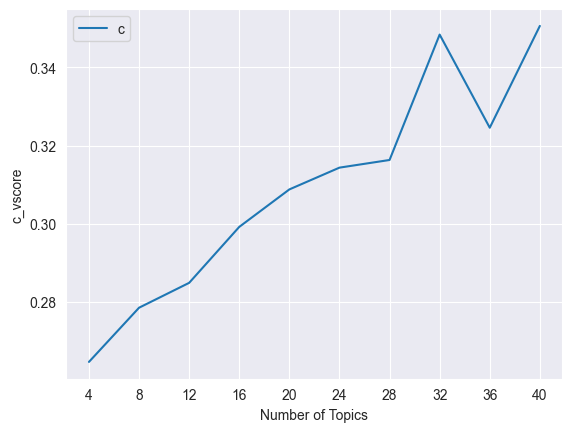

In [156]:
# Fixate alpha & beta

plt.xticks(np.arange(MIN_TOPICS, MAX_TOPICS, STEP_TOPIC))
plt.yticks(np.arange(0.20, 0.40, 0.02))

plt.plot(tunes_topics['Topics'], tunes_topics['Coherence'])

plt.xlabel("Number of Topics")
plt.ylabel(MEASURE + 'score')
plt.legend(('coherence_score'), loc='best')
plt.show()

Лучший результат получается при 40 топиках

In [163]:
lda_model = gensim.models.LdaMulticore(
    bow_corpus,
    num_topics=40,
    id2word=dic,
    passes=10,
    workers=2,
    random_state=RANDOM_SEED,
)
lda_model.show_topics()

[(np.int64(28),
  '0.021*"denim" + 0.018*"want" + 0.017*"time" + 0.015*"know" + 0.011*"yeah" + 0.010*"blue" + 0.009*"known" + 0.009*"whole" + 0.009*"indigo" + 0.008*"people"'),
 (np.int64(1),
  '0.033*"mushroom" + 0.016*"potato" + 0.012*"flavor" + 0.011*"add" + 0.011*"milk" + 0.011*"onion" + 0.009*"plus" + 0.009*"like" + 0.009*"oil" + 0.008*"going"'),
 (np.int64(11),
  '0.027*"mic" + 0.027*"cisco" + 0.027*"drop" + 0.016*"restaurant" + 0.015*"like" + 0.014*"food" + 0.011*"get" + 0.011*"local" + 0.011*"one" + 0.010*"thing"'),
 (np.int64(18),
  '0.011*"like" + 0.009*"system" + 0.008*"based" + 0.008*"model" + 0.008*"get" + 0.008*"tape" + 0.007*"make" + 0.007*"dismissed" + 0.006*"high" + 0.006*"continued"'),
 (np.int64(6),
  '0.011*"pack" + 0.011*"one" + 0.010*"like" + 0.009*"mod" + 0.009*"city" + 0.007*"make" + 0.007*"gon" + 0.007*"neighborhood" + 0.006*"thing" + 0.006*"deception"'),
 (np.int64(16),
  '0.018*"wood" + 0.016*"cherry" + 0.012*"salmon" + 0.011*"one" + 0.011*"make" + 0.010*"lik

In [164]:
lda_model

[(np.int64(34),
  '0.036*"pasta" + 0.020*"rest" + 0.019*"water" + 0.018*"shallot" + 0.017*"peace" + 0.014*"get" + 0.014*"nice" + 0.013*"flavor" + 0.013*"really" + 0.011*"sauce"'),
 (np.int64(1),
  '0.033*"mushroom" + 0.016*"potato" + 0.012*"flavor" + 0.011*"add" + 0.011*"milk" + 0.011*"onion" + 0.009*"plus" + 0.009*"like" + 0.009*"oil" + 0.008*"going"'),
 (np.int64(3),
  '0.039*"cell" + 0.027*"chromosome" + 0.015*"one" + 0.014*"really" + 0.012*"immune" + 0.011*"gene" + 0.010*"know" + 0.009*"like" + 0.009*"cancer" + 0.009*"people"'),
 (np.int64(22),
  '0.026*"chocolate" + 0.026*"water" + 0.022*"done" + 0.020*"well" + 0.020*"sam" + 0.016*"fat" + 0.011*"set" + 0.009*"going" + 0.009*"gram" + 0.007*"store"'),
 (np.int64(15),
  '0.028*"bean" + 0.009*"want" + 0.009*"time" + 0.009*"named" + 0.009*"sock" + 0.009*"cat" + 0.009*"scarf" + 0.009*"app" + 0.009*"focus" + 0.009*"gummy"'),
 (np.int64(16),
  '0.018*"wood" + 0.016*"cherry" + 0.012*"salmon" + 0.011*"one" + 0.011*"make" + 0.010*"like" + 0.

In [165]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bow_corpus, dic, mds='tsne')
vis

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
26     -7.728038 -16.508665       1        1  13.468752
4      -4.522264 -22.480572       2        1   7.182755
23    -11.390674 -22.144907       3        1   5.081303
7      22.135237 -15.333502       4        1   4.204529
8       8.069751 -33.464859       5        1   4.066255
3     -16.333464 -14.118050       6        1   3.985548
1     -25.888449  -9.440565       7        1   3.705217
9      12.998544  -7.323270       8        1   3.266231
11     -6.423846 -31.277809       9        1   3.251091
13     -0.530971 -17.414656      10        1   3.248480
29    -19.677794 -22.480316      11        1   3.032654
38     -4.731739 -10.976686      12        1   2.764389
18    -21.180407   5.103816      13        1   2.697800
16      4.538373 -25.500734      14        1   2.694538
21     21.149946  -4.722770      15        1   2.427379
12    -16.698324  -3.500531      16        1   2.276231
19    -10.640966  -8.216024      17        1   2.247264
6      -1.097473  -4.409333      18        1   2.203092
17      1.402157 -11.319579      19        1   2.113348
28    -12.207768   4.676635      20        1   1.954274
30      8.041048 -17.702728      21        1   1.866815
34     14.985485 -25.410145      22        1   1.798389
20     14.608278 -13.684816      23        1   1.774499
35     21.383434   4.128836      24        1   1.684210
2      -7.136747  -1.308352      25        1   1.633618
5      15.315216  16.490257      26        1   1.632690
25      7.083789  12.415229      27        1   1.489247
24     -6.086875  20.203480      28        1   1.376212
36      5.871962  -3.446297      29        1   1.301049
33     14.278254   7.951532      30        1   1.238237
32      5.815787  20.560900      31        1   1.223269
27     -0.767146  14.607063      32        1   1.218104
22     -6.093743   9.007046      33        1   1.185982
10     12.806220   0.064309      34        1   1.112004
0       7.939367   5.277944      35        1   1.079100
39    -13.464359  14.567657      36        1   1.072919
37      7.006974  -9.270576      37        1   0.800112
31      1.372610   7.887746      38        1   0.462818
15      3.094289   1.683641      39        1   0.163202
14     -1.928644   3.068495      40        1   0.016393, topic_info=        Term        Freq       Total Category  logprob  loglift
675  chicken   95.000000   95.000000  Default  30.0000  30.0000
300      bye   64.000000   64.000000  Default  29.0000  29.0000
292     yeah  151.000000  151.000000  Default  28.0000  28.0000
119     want  155.000000  155.000000  Default  27.0000  27.0000
418     cell   59.000000   59.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
46     right    0.000992  156.492358  Topic40  -8.6156  -3.2526
119     want    0.000990  155.016192  Topic40  -8.6179  -3.2454
582     also    0.000978  101.179018  Topic40  -8.6297  -2.8305
121      yes    0.000966   63.156061  Topic40  -8.6427  -2.3723
80     going    0.000960  245.771374  Topic40  -8.6487  -3.7371

[2565 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2169      1  0.266205       000
2169      3  0.159723       000
2169      5  0.053241       000
2169     11  0.053241       000
2169     16  0.053241       000
...     ...       ...       ...
1978      8  0.783146       zay
1587     37  0.723485     ziggy
5027      4  0.307551    zombie
5027     20  0.615101    zombie
4675      1  0.940691  zucchini

[6718 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[27, 5, 24, 8, 9, 4, 2, 10, 12, 14, 30, 39, 19, 17, 22, 13, 20, 7, 18, 29, 31, 35, 21, 36, 3, 6, 26, 25, 37, 34, 33, 28, 23, 11, 1, 40, 38, 32, 16, 15])

In [166]:
from typing import Tuple

def get_topic(words, lda) -> Tuple[Any, Any]:
    """
    Функция назначает документу наиболее вероятный топик
    :param words: лемматизированный текст документа
    :param lda: тематическая модель
    :return: список из наиболее вероятного топика 
    и его вероятности
    """
    bag = lda.id2word.doc2bow(words)
    topics = lda.get_document_topics(bag)
    topic_dictionary = {}
    for topic in topics:
        topic_dictionary[topic[1]] = str((topic[0])) 
    main_probability = max(topic_dictionary)
    main_topic = topic_dictionary[main_probability]
    return (main_topic, main_probability)

In [173]:
predictions = [get_topic(word_tokenize(text),lda_model) for text in df['preprocessed_text']]

labels, probas = zip(*predictions)

df['lda_label'] = labels
df['lda_probas'] = probas
df

,filename,text,n_tokens,length,lang,score,preprocessed_text,tokenized_text,filtered_tokens,filtered_n_tokens,unique_tokens,unique_n_tokens,is_valid,lda_label,lda_probas
0,IMG_0703.tsv,This is the most dangerous strike in mixed mar...,171,877,en,0.850605,this is the most dangerous strike in mixed mar...,"[this, is, the, most, dangerous, strike, in, m...","[dangerous, strike, mixed, martial, arts, hamm...",78,"[strike, whole, moat, right, pull, shot, time,...",67,True,6,0.985867
1,IMG_0704.tsv,"So this puzzle is a little harder, but let's g...",142,760,en,0.981890,so this puzzle is little harder but let give i...,"[so, this, puzzle, is, little, harder, but, le...","[puzzle, little, harder, let, give, go, mitten...",73,"[added, let, new, two, bridge, link, issues, d...",62,True,37,0.965570
2,IMG_0705.tsv,I want to talk about the lie of cultural appro...,716,3971,en,0.983911,want to talk about the lie of cultural appropr...,"[want, to, talk, about, the, lie, of, cultural...","[want, talk, lie, cultural, appropriation, whi...",341,"[ignorant, believe, leave, much, lie, video, a...",200,True,17,0.941724
6,IMG_0712.tsv,Max Verstappen spent the last four weeks playi...,268,1512,en,0.978078,max verstappen spent the last four weeks playi...,"[max, verstappen, spent, the, last, four, week...","[max, verstappen, spent, last, four, weeks, pl...",145,"[mine, luxury, bin, enough, three, yeah, house...",103,True,24,0.666048
7,IMG_0714.tsv,"As you all know, we're making a game called Pe...",98,520,en,0.939781,as you all know we re making game called peek ...,"[as, you, all, know, we, re, making, game, cal...","[know, making, game, called, peek, together, a...",36,"[added, option, finding, time, optional, get, ...",29,True,9,0.899177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,IMG_1916.tsv,"Your favorite dinosaurs are T-Rex? Well, that'...",142,846,en,0.938825,your favorite dinosaurs are rex well that nuts...,"[your, favorite, dinosaurs, are, rex, well, th...","[favorite, dinosaurs, rex, well, nuts, favorit...",87,"[steroids, technically, let, active, bro, gays...",70,True,27,0.971089
296,IMG_1923.tsv,That is why you never try to spell Mississippi...,157,915,en,0.944783,that is why you never try to spell mississippi...,"[that, is, why, you, never, try, to, spell, mi...","[never, try, spell, mississippi, mouth, full, ...",81,"[oh, every, insignificant, woven, pistol, feel...",66,True,24,0.987657
297,IMG_1926.tsv,Why are there kids painting in the streets on ...,490,2880,en,0.960431,why are there kids painting in the streets on ...,"[why, are, there, kids, painting, in, the, str...","[kids, painting, streets, random, weekday, sep...",246,"[hawthorne, explain, project, treatment, three...",197,True,6,0.951398
298,IMG_1929.tsv,and for today's experiment we're going with ba...,180,922,en,0.948105,and for today experiment we re going with baco...,"[and, for, today, experiment, we, re, going, w...","[today, experiment, going, bacon, fat, melting...",96,"[roasted, much, usual, gluten, yet, dough, hou...",81,True,19,0.972879


In [176]:
lda_model.save(str(ROOT_PATH / 'data/lda.model'))


In [189]:
# Extract topic-word distributions
topics_data = []
for topic_id in range(lda_model.num_topics):
    topic_words = lda_model.show_topic(topic_id, topn=10) # Get top 10 words for each topic
    topic_info = {
        "topic_id": topic_id,
        "words": [{"word": word, "probability": float(prob)} for word, prob in topic_words]
    }
    topics_data.append(topic_info)

# Save the topics data to a JSON file
output_filename = "lda_topics.json"
with open(ROOT_PATH /'data' / output_filename, 'w', encoding='utf-8') as f:
    json.dump(topics_data, f, ensure_ascii=False, indent=4)

print(f"LDA topics saved to {output_filename}")

LDA topics saved to lda_topics.json
